In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow_datasets as tfds

tf.logging.set_verbosity(tf.logging.ERROR)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
from tfp_vae.vae import VAE

In [3]:
import numpy as np
import time
from IPython.display import clear_output

In [4]:
## hyperparams

hps = tf.contrib.training.HParams(
    batch_size=64,
    img_height=32,
    img_width=32,
    img_channels=3,
    z_dim=200,
    discrete_outputs=False,
    activation=tf.nn.elu,
    num_epochs=10)

# Construct a tf.data.Dataset
ds_train, ds_test = tfds.load(name="cifar10", split=["train", "test"])

def preprocess_dataset(dataset, hps, epochs):
    f1 = lambda row: row["image"]
    f2 = lambda img: tf.cast(img, dtype=tf.int32)
    f3 = lambda img: tf.cast(img, dtype=tf.float32)
    f4 = lambda img: img * tf.constant((1.0 / 255.0))
    f5 = lambda img: tf.image.resize_images(img, [hps.img_height, hps.img_width])
    f5 = lambda img: 2.0 * (img - 0.5)
    normalize_pixels = lambda row: f5(f4(f3(f2(f1(row)))))

    ds = dataset.map(normalize_pixels)
    ds = ds.shuffle(1000)
    ds = ds.batch(hps.batch_size)
    ds = ds.repeat(epochs)
    ds = ds.prefetch(3)
    return ds

ds_train = preprocess_dataset(ds_train, hps, epochs=hps.num_epochs)
ds_test = preprocess_dataset(ds_test, hps, epochs=1)

vae = VAE(hps)
sess = tf.Session()

summaries_dir = '/tmp/vae_tfp_summaries'
train_writer = tf.summary.FileWriter(summaries_dir + '/train', sess.graph)
test_writer = tf.summary.FileWriter(summaries_dir + '/test')

init_op = tf.global_variables_initializer()
_ = sess.run(init_op)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
%matplotlib inline

In [6]:
iteration = 0

for xs in tfds.as_numpy(ds_train):
    
    clear_output(wait=True)
    
    elbo = vae.train(sess, xs)
    
    print('Iter {}... ELBO: {}'.format(iteration, elbo))
    
    if iteration % 10 == 0:
        gen_xs = vae.generate(sess, num_samples=5)
        recon_xs = vae.reconstruct(sess, xs[0:5])
        viz_row_1 = np.concatenate([x for x in gen_xs], axis=1)
        viz_row_2 = np.concatenate([x for x in recon_xs], axis=1)
        viz = np.concatenate([viz_row_1, viz_row_2], axis=0)
        viz = (viz / 2.0) + 0.5
        plt.imshow(viz, cmap=None)
        plt.show()
    
    iteration += 1

Iter 7819... ELBO: 738.4439697265625


In [7]:
def interpolate_random_pairs(x, num_pairs=5):
    rows = []
    def interpolate_pair():
        i = np.random.randint(hps.batch_size)
        j = np.random.randint(hps.batch_size)
        x1 = x[i]
        x2 = x[j]
        interpolations = vae.interpolate(sess, x1, x2)
        
        row = np.concatenate([x1] + [interpolations[i] for i in range(0, 5)] + [x2], axis=1)
        if hps.img_channels == 1:
            row = row[:,:,0]
            
        return row
    
    rows = [interpolate_pair() for _ in range(0, num_pairs)]
    viz = np.concatenate(rows, axis=0)
    cmap_spec = 'gray' if hps.img_channels == 1 else None
    if hps.discrete_outputs == False:
        viz = 0.5 * viz + 0.5
    plt.imshow(viz, cmap=cmap_spec)
    plt.show()

In [8]:
xs = [i for i in tfds.as_numpy(ds_train.take(1))][0]

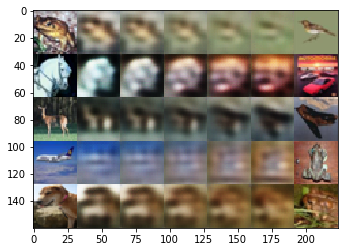

In [9]:
interpolate_random_pairs(xs)

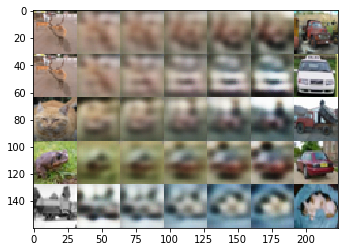

In [11]:
xs = [i for i in tfds.as_numpy(ds_train.take(1))][0]
interpolate_random_pairs(xs)

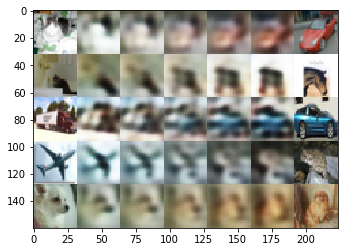

In [12]:
xs = [i for i in tfds.as_numpy(ds_train.take(1))][0]
interpolate_random_pairs(xs)

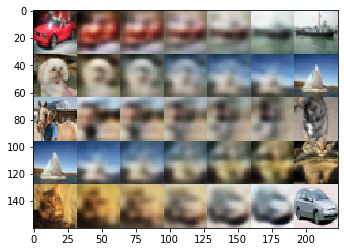

In [13]:
xs = [i for i in tfds.as_numpy(ds_train.take(1))][0]
interpolate_random_pairs(xs)

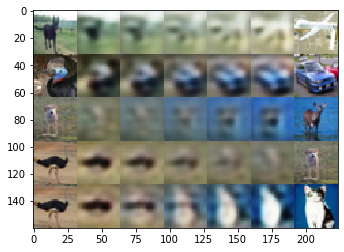

In [14]:
xs = [i for i in tfds.as_numpy(ds_train.take(1))][0]
interpolate_random_pairs(xs)

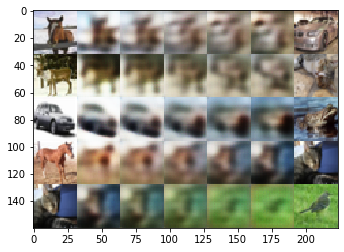

In [15]:
xs = [i for i in tfds.as_numpy(ds_train.take(1))][0]
interpolate_random_pairs(xs)

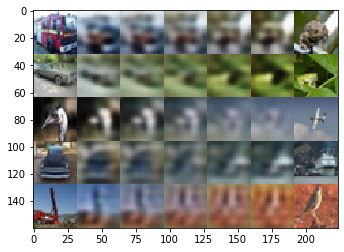

In [16]:
xs = [i for i in tfds.as_numpy(ds_train.take(1))][0]
interpolate_random_pairs(xs)

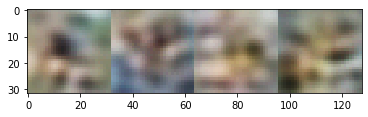

In [20]:
gen_xs = vae.generate(sess, num_samples=4)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

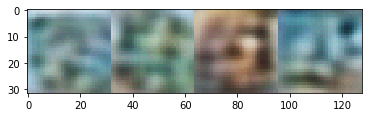

In [21]:
gen_xs = vae.generate(sess, num_samples=4)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

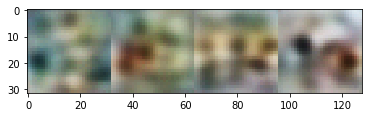

In [22]:
gen_xs = vae.generate(sess, num_samples=4)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

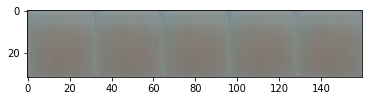

In [23]:
gen_xs = vae.generate_from_code(sess, np.zeros(shape=(5, hps.z_dim)))
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

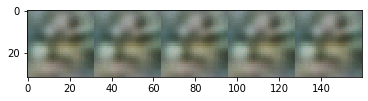

In [24]:
gen_xs = vae.generate_from_code(sess, np.ones(shape=(5, hps.z_dim)))
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

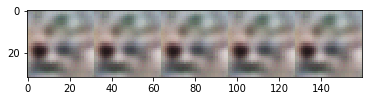

In [25]:
gen_xs = vae.generate_from_code(sess, -np.ones(shape=(5, hps.z_dim)))
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

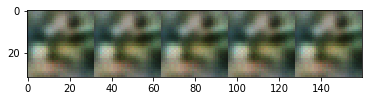

In [26]:
gen_xs = vae.generate_from_code(sess, 2.0 * np.ones(shape=(5, hps.z_dim)))
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

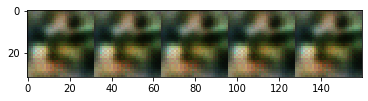

In [27]:
gen_xs = vae.generate_from_code(sess, 3.0 * np.ones(shape=(5, hps.z_dim)))
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

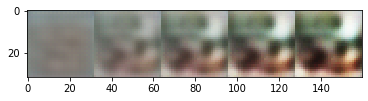

In [100]:
z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
z_code[:, 0] = 5.0 * np.arange(5)
gen_xs = vae.generate_from_code(sess, z_code)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

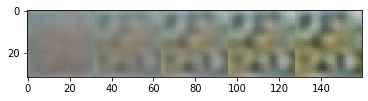

In [99]:
z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
z_code[:, 1] = 5.0 * np.arange(5)
gen_xs = vae.generate_from_code(sess, z_code)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

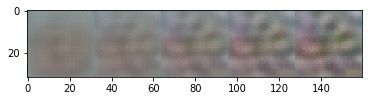

In [98]:
z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
z_code[:, 2] = 5.0 * np.arange(5)
gen_xs = vae.generate_from_code(sess, z_code)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

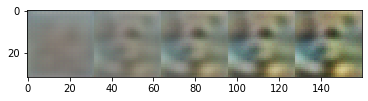

In [97]:
z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
z_code[:, 3] = 5.0 * np.arange(5)
gen_xs = vae.generate_from_code(sess, z_code)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

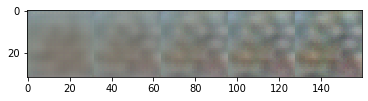

In [96]:
z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
z_code[:, 4] = 5.0 * np.arange(5)
gen_xs = vae.generate_from_code(sess, z_code)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

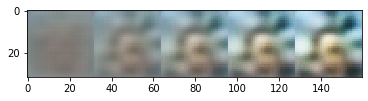

In [87]:
z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
z_code[:, 5] = 5.0 * np.arange(5)
gen_xs = vae.generate_from_code(sess, z_code)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

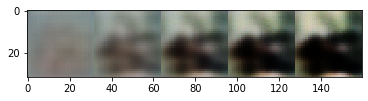

In [88]:
z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
z_code[:, 6] = 5.0 * np.arange(5)
gen_xs = vae.generate_from_code(sess, z_code)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

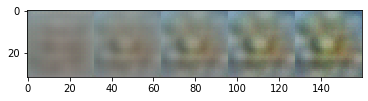

In [89]:
z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
z_code[:, 7] = 5.0 * np.arange(5)
gen_xs = vae.generate_from_code(sess, z_code)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

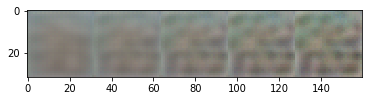

In [95]:
z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
z_code[:, 8] = 5.0 * np.arange(5)
gen_xs = vae.generate_from_code(sess, z_code)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

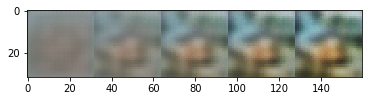

In [91]:
z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
z_code[:, 9] = 5.0 * np.arange(5)
gen_xs = vae.generate_from_code(sess, z_code)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

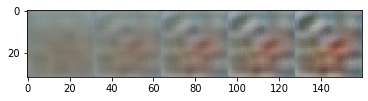

In [92]:
z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
z_code[:, 10] = 5.0 * np.arange(5)
gen_xs = vae.generate_from_code(sess, z_code)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

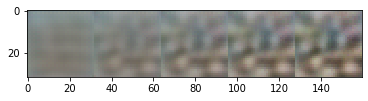

In [93]:
z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
z_code[:, 11] = 5.0 * np.arange(5)
gen_xs = vae.generate_from_code(sess, z_code)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

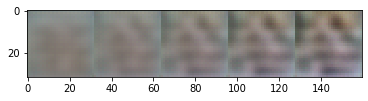

In [94]:
z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
z_code[:, 12] = 2.0 * np.arange(5)
gen_xs = vae.generate_from_code(sess, z_code)
viz = np.concatenate([x for x in gen_xs], axis=1)
viz = (viz / 2.0) + 0.5
plt.imshow(viz, cmap=None)
plt.show()

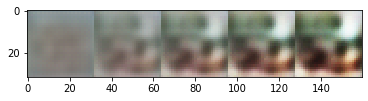

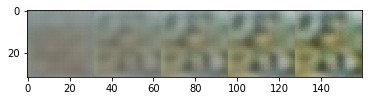

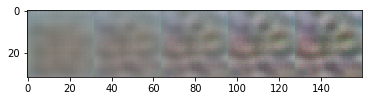

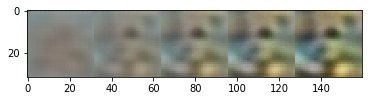

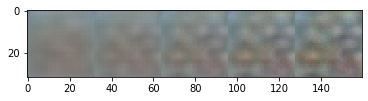

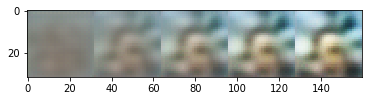

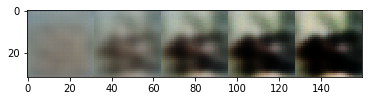

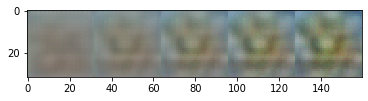

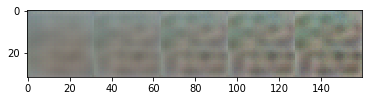

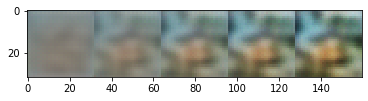

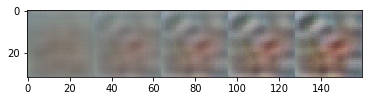

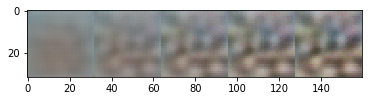

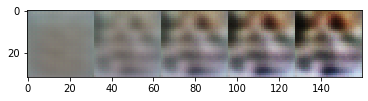

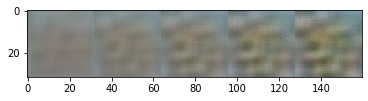

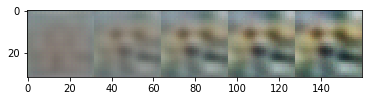

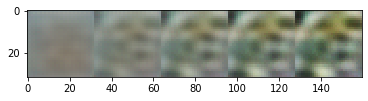

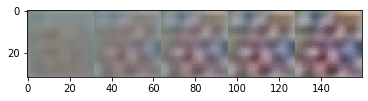

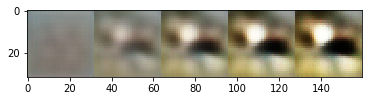

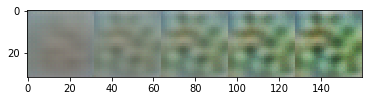

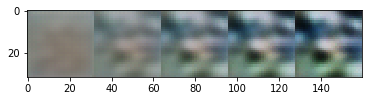

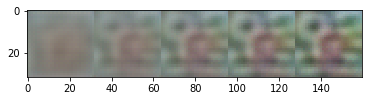

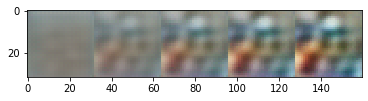

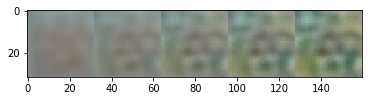

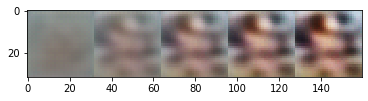

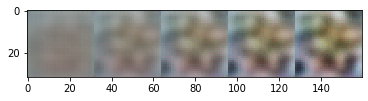

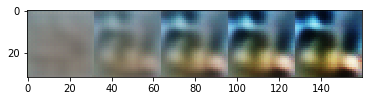

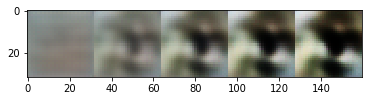

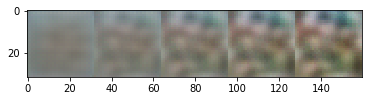

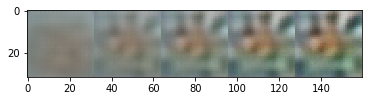

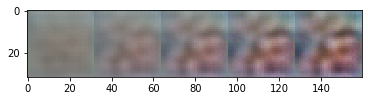

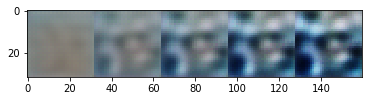

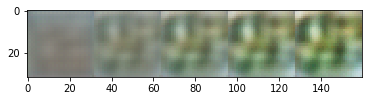

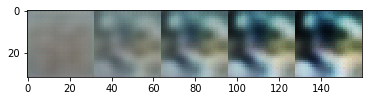

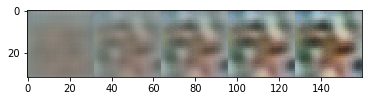

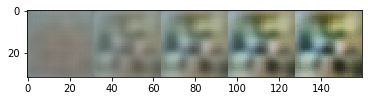

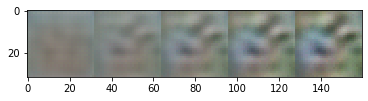

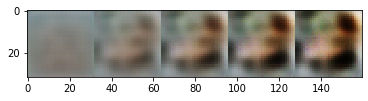

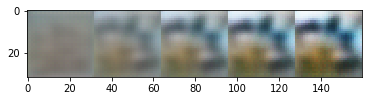

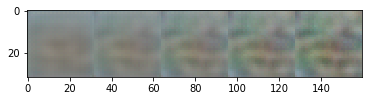

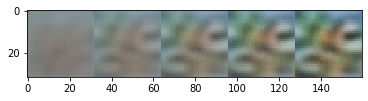

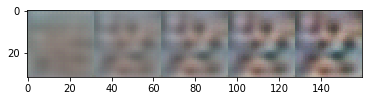

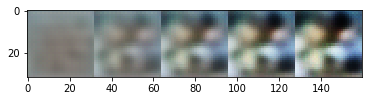

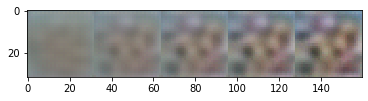

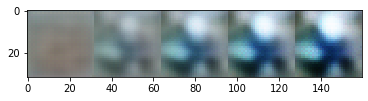

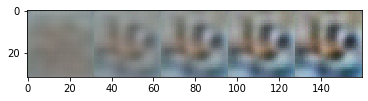

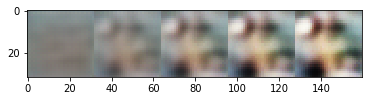

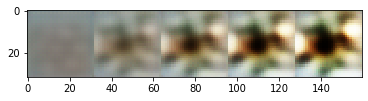

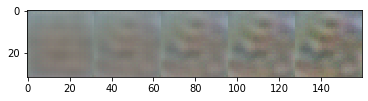

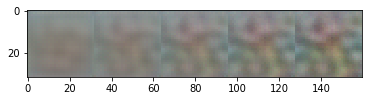

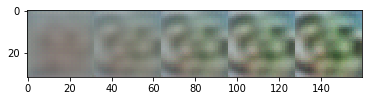

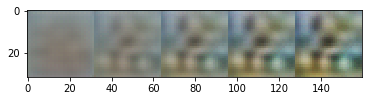

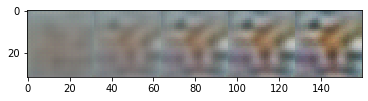

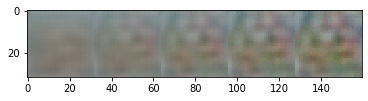

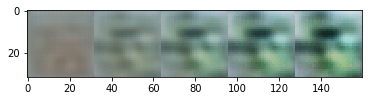

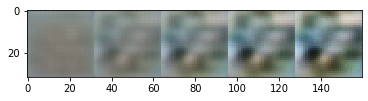

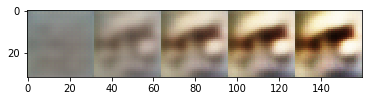

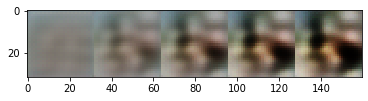

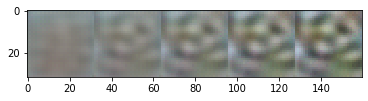

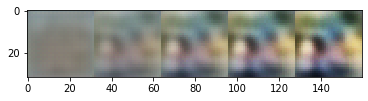

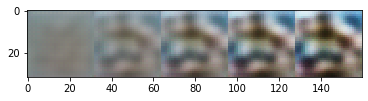

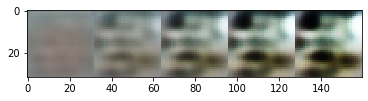

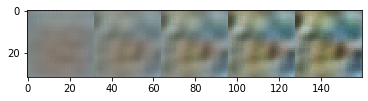

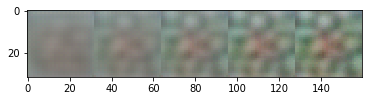

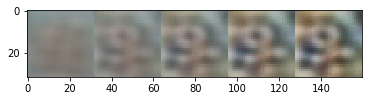

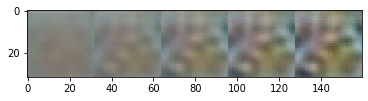

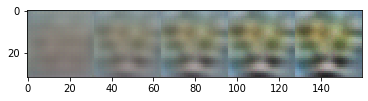

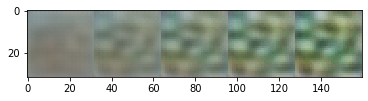

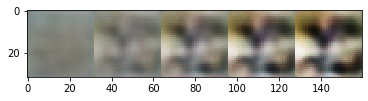

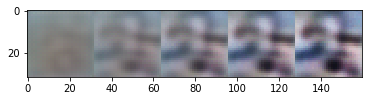

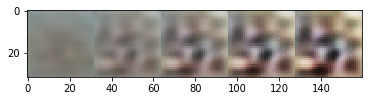

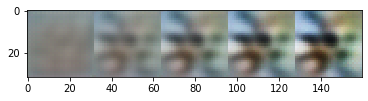

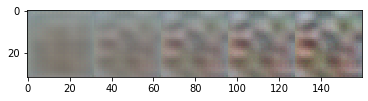

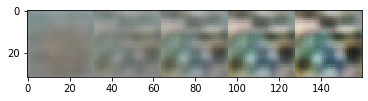

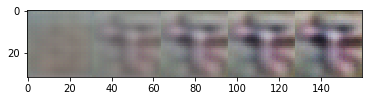

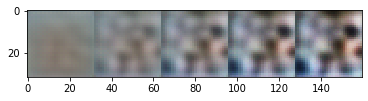

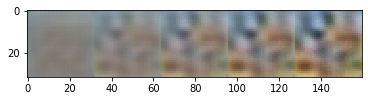

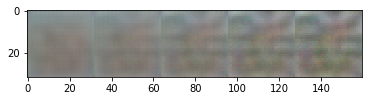

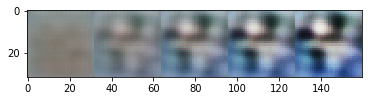

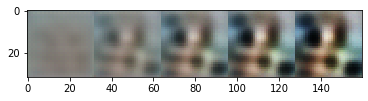

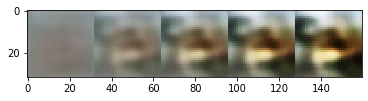

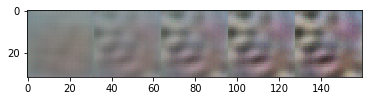

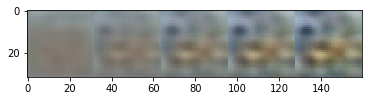

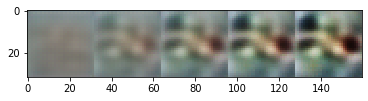

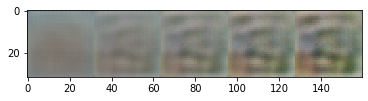

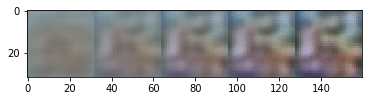

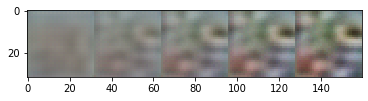

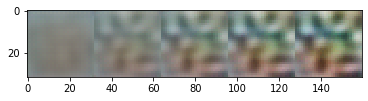

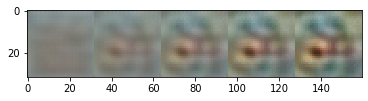

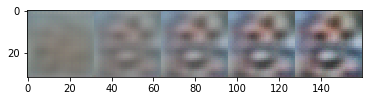

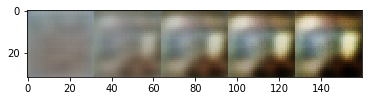

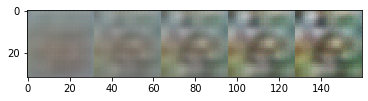

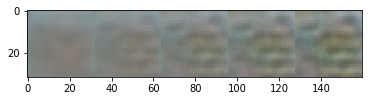

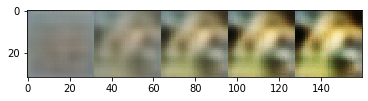

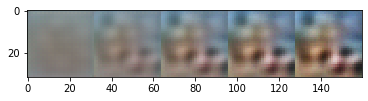

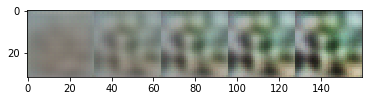

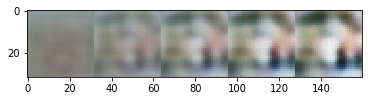

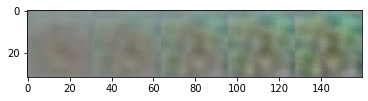

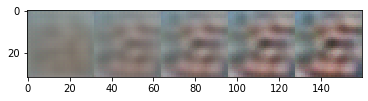

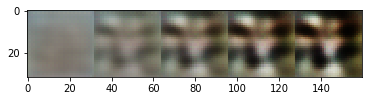

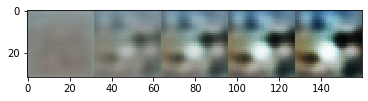

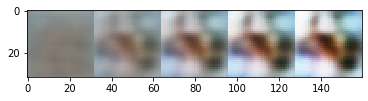

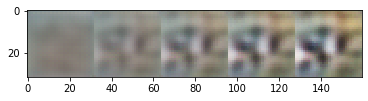

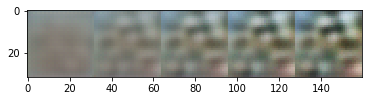

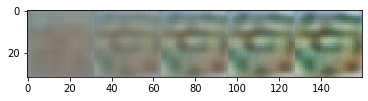

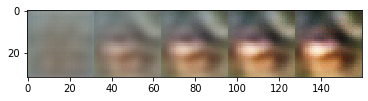

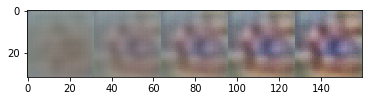

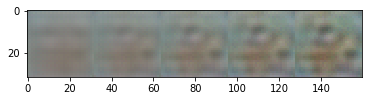

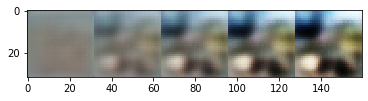

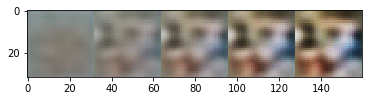

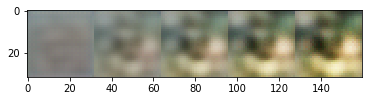

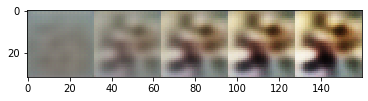

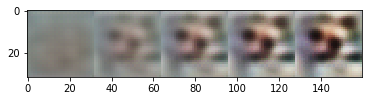

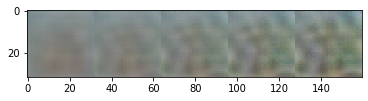

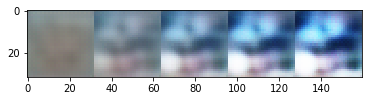

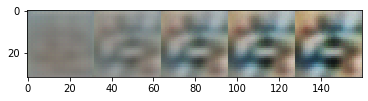

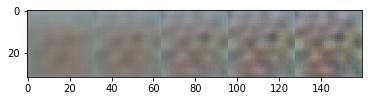

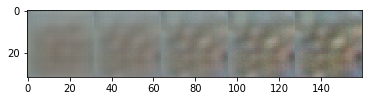

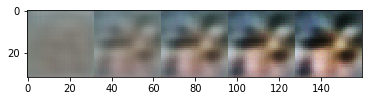

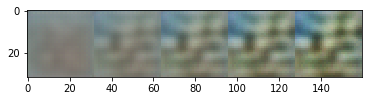

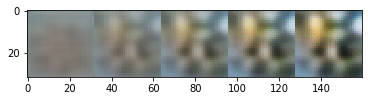

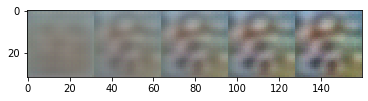

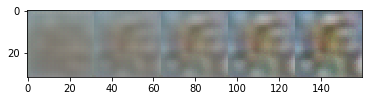

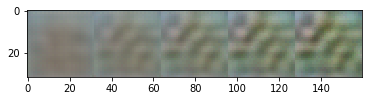

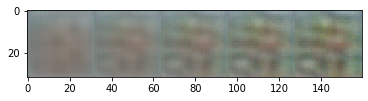

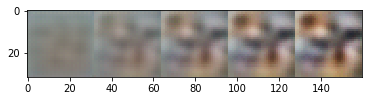

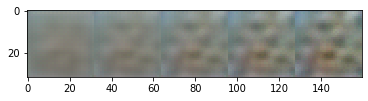

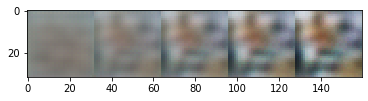

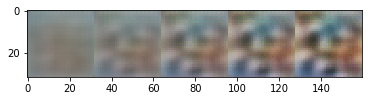

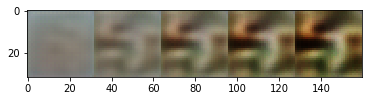

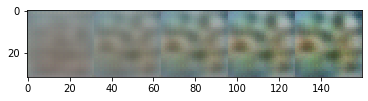

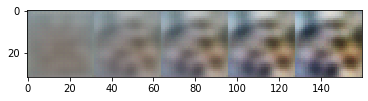

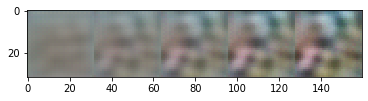

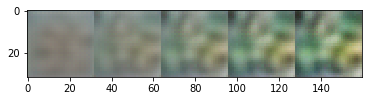

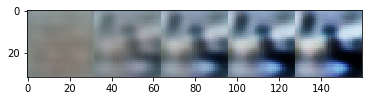

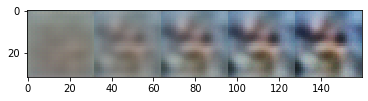

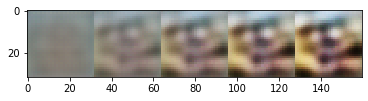

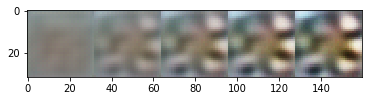

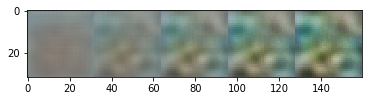

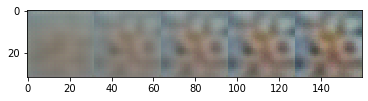

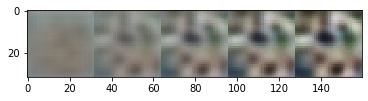

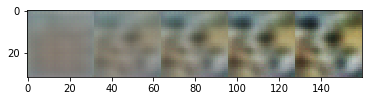

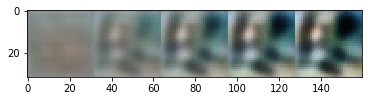

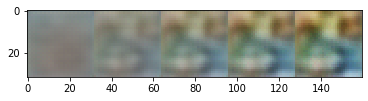

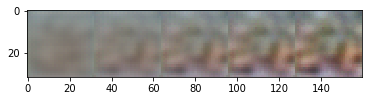

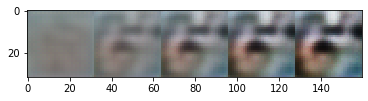

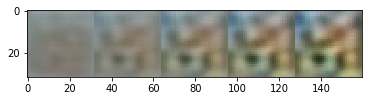

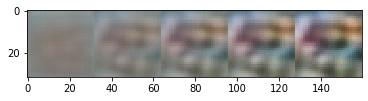

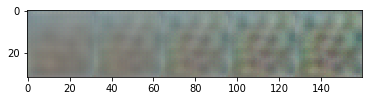

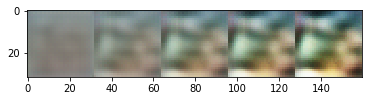

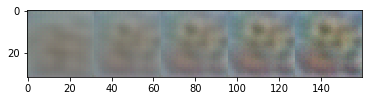

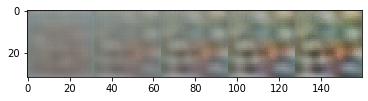

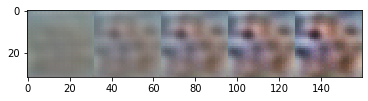

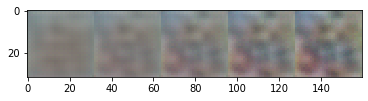

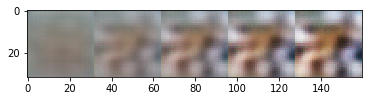

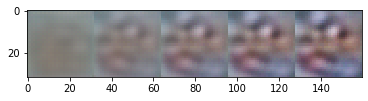

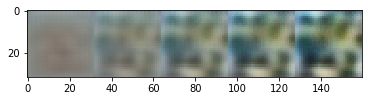

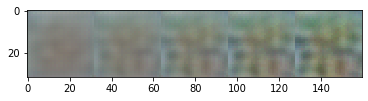

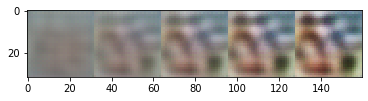

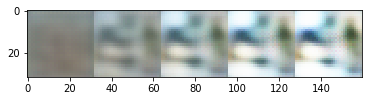

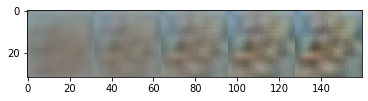

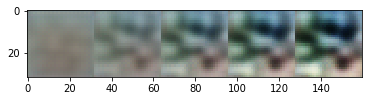

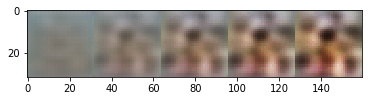

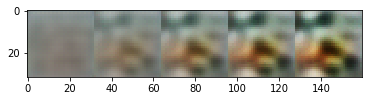

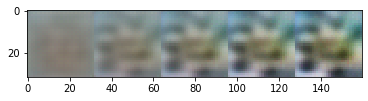

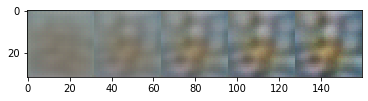

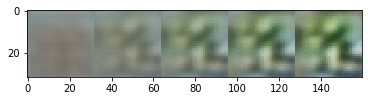

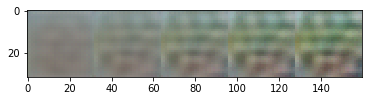

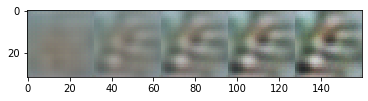

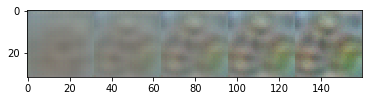

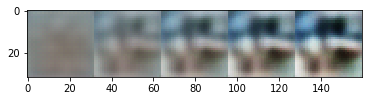

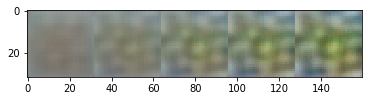

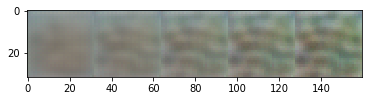

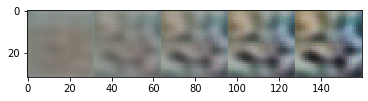

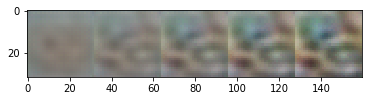

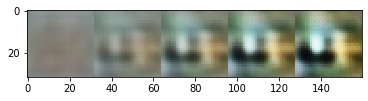

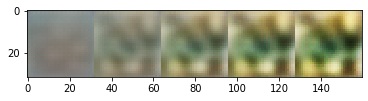

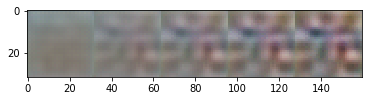

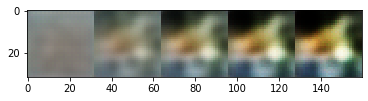

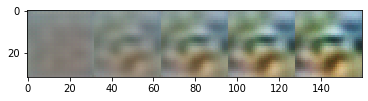

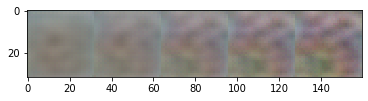

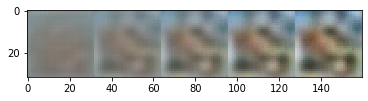

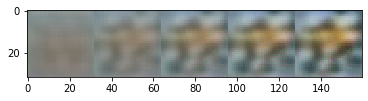

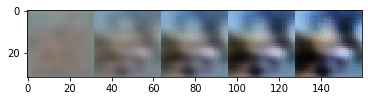

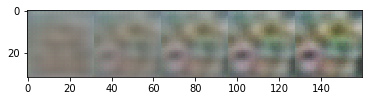

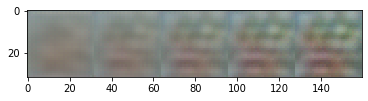

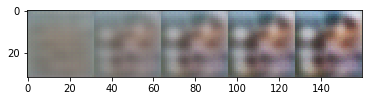

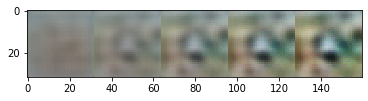

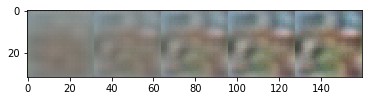

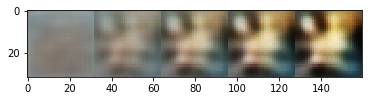

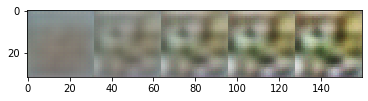

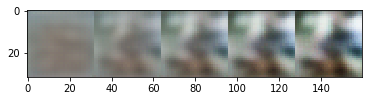

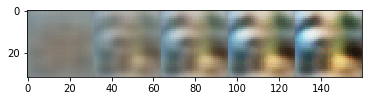

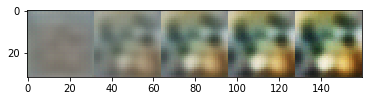

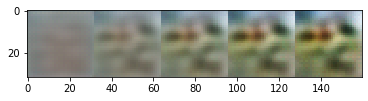

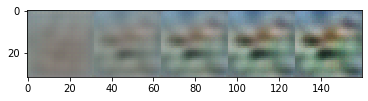

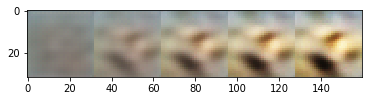

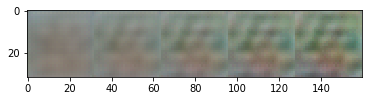

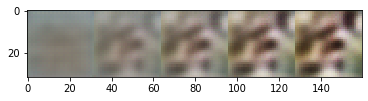

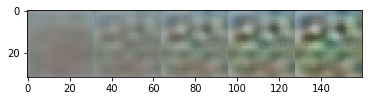

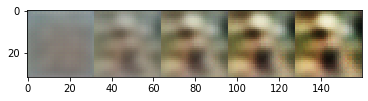

In [105]:
def generate_viz_for_zi(i):
    z_code = np.random.normal(loc=0.0, scale=0.1, size=(1, hps.z_dim))
    z_code = np.concatenate([z_code for _ in range(0,5)], axis=0)
    z_code[:, i] = 5.0 * np.arange(5)
    gen_xs = vae.generate_from_code(sess, z_code)
    viz = np.concatenate([x for x in gen_xs], axis=1)
    viz = (viz / 2.0) + 0.5
    return viz

for i in range(0, hps.z_dim):
    plt.imshow(generate_viz_for_zi(i))
    plt.show()

In [ ]:
# generate gifs, and then run

In [ ]:
with open('../generated.gif','rb') as f:
    display(Image(data=f.read(), format='png'))